## 과제 2-1. 팀 별로 정해진 모델에 맞게 분류 모델 만들어오기
- 모델의 장단점 및 해당 모델에 맞는 특성공학 기법을 정리한 뒤, 해당 모델에 맞는 특성공학 기법을 적용해야 함
- 사용할 데이터 : 오늘 수업 때 배운 diabetes.csv
- 1조 : 랜덤포레스트, 2조 : Gradient Boosting

## 과제 2-2. (기본) 5. 회귀모델 만들기 예습

### Random Forest  

Random Forest는 앙상블(Ensemble) 기법 중 하나로, 여러 개의 결정 트리(Decision Tree)를 조합하여 더 강력하고 안정적인 예측 모델을 만드는 방법dl다.  
하나의 결정트리가 모든 feature를 변수로 사용해서 y값을 예측한다면 앞서 말한대로 오버피팅 문제가 발생한다. 그래서 랜덤포레스트는 feature를 무작위로 뽑거나, 데이터를 무작위로 뽑아서 여러개의 작은 트리를 만들고 그 트리들을 결합한다.

요약: Random Forest는 Decision Tree를 Bagging 방법(약한 모델을 여러 개 학습하여 강력한 모델을 만드는 방법)으로 학습한 모델

### RandomForestClassifier 하이퍼 파라미터

- n_estimators: 트리를 몇 개 만들 것인지 (int, default=100), 값이 클수록 오버피팅 방지  

- criterion: gini 또는 entropy 중 선택

- max_depth: 트리의 깊이 (int, default=None)

- bootstrap: True이면 전체 feature에서 복원추출해서 트리 생성 (default=True)

- max_features: 선택할 feature의 개수, 보통 default값으로 씀 (default='auto')

### 데이터 전처리

In [1]:
#필요한 라이브러리 로드
#데이터 분석을 위한 pandas, 수치계산을 위한 numpy
#시각화를 위한 seaborn, matplotlib.pyplot 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df= pd.read_csv("C:/Users/강태희/Documents/data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()


# 인슐린의 평균이 79.8 인데 최대값이 846임. 이상치가 있을거라고 파악되므로 boxplot을 그려서 사분위수를 파악해보자

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='Insulin'>

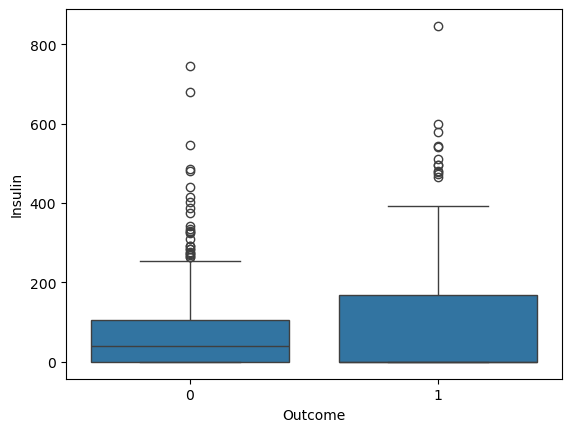

In [15]:
sns.boxplot(x='Outcome', y='Insulin', data=df)


# 이상치가 매우 많음. 이는 인슐린 수치가 편향된 분포를 갖고 있으며, 상위쪽으로 긴 꼬리를 가진다(positive skew)는 걸 나타냄.
# 중앙값 비교: 당뇨가 없는 그룹(Outcome=0)보다 당뇨가 있는 그룹(Outcome=1)이 인슐린 중앙값이 약간 더 높음.
# 분산: Outcome=1 쪽 상자가 좀 더 길고, 이상치도 많아서 분산이 더 큼을 나타냄

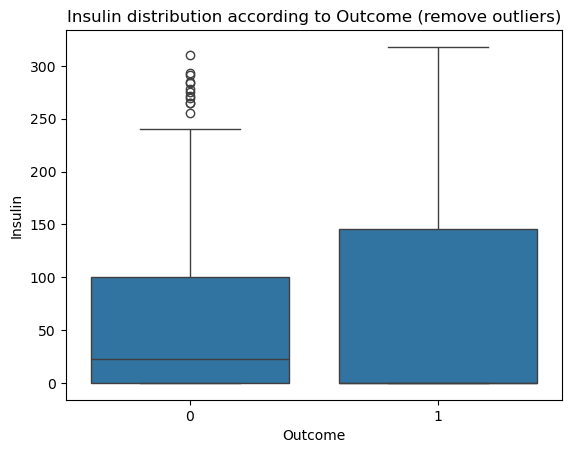

In [19]:
#인슐린 분포의 이상치를 제거하기 위해 사분위수 구하기

Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
df_no_outliers = df[(df['Insulin'] >= lower_bound) & (df['Insulin'] <= upper_bound)]

# 이상치 제거 후, 다시 boxplot 그리기
sns.boxplot(x='Outcome', y='Insulin', data=df_no_outliers)
plt.title('Insulin distribution according to Outcome (remove outliers)')
#한글로 제목을 달면 오류가 나서 영어로 지었음

plt.show()

In [37]:
df_no_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
df_no_outliers.shape

#전체 768행에서 이상치 제외 후 734 행이 된 것을 확인할 수 있음

(734, 9)

In [41]:
df_no_outliers.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,3.841962,119.182561,68.990463,19.985014,62.328338,31.854087,0.466918,33.185286,0.339237
std,3.383143,31.266437,19.613487,15.951788,79.132557,7.919395,0.322066,11.714824,0.473773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243250,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,0.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,115.000000,36.400000,0.613750,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,318.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'correlation heatmap')

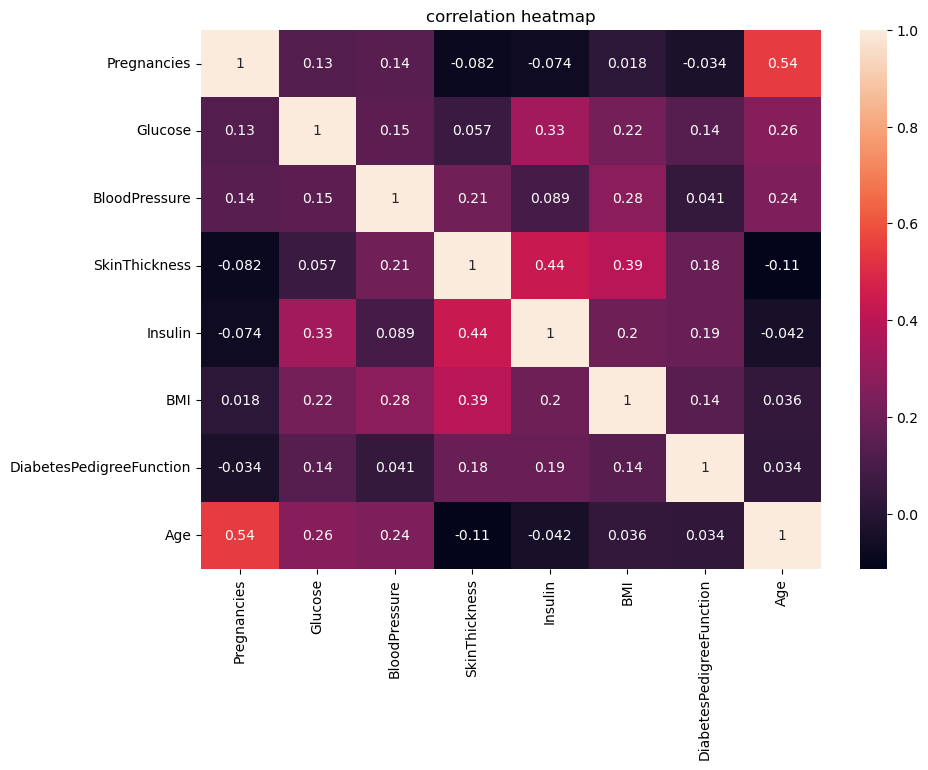

In [23]:
#상관계수 값 구하기

plt.figure(figsize=(10,7))  
sns.heatmap(df[['Pregnancies', 'Glucose',	'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',	'DiabetesPedigreeFunction', 'Age']].corr(),annot=True) 
plt.title('correlation heatmap') 

# Age와 Pregnancies, SkinThickness와 Insulin 사이의 상관계수가 비교적 높은 편이라는걸 확인할 수 있음

<function matplotlib.pyplot.show(close=None, block=None)>

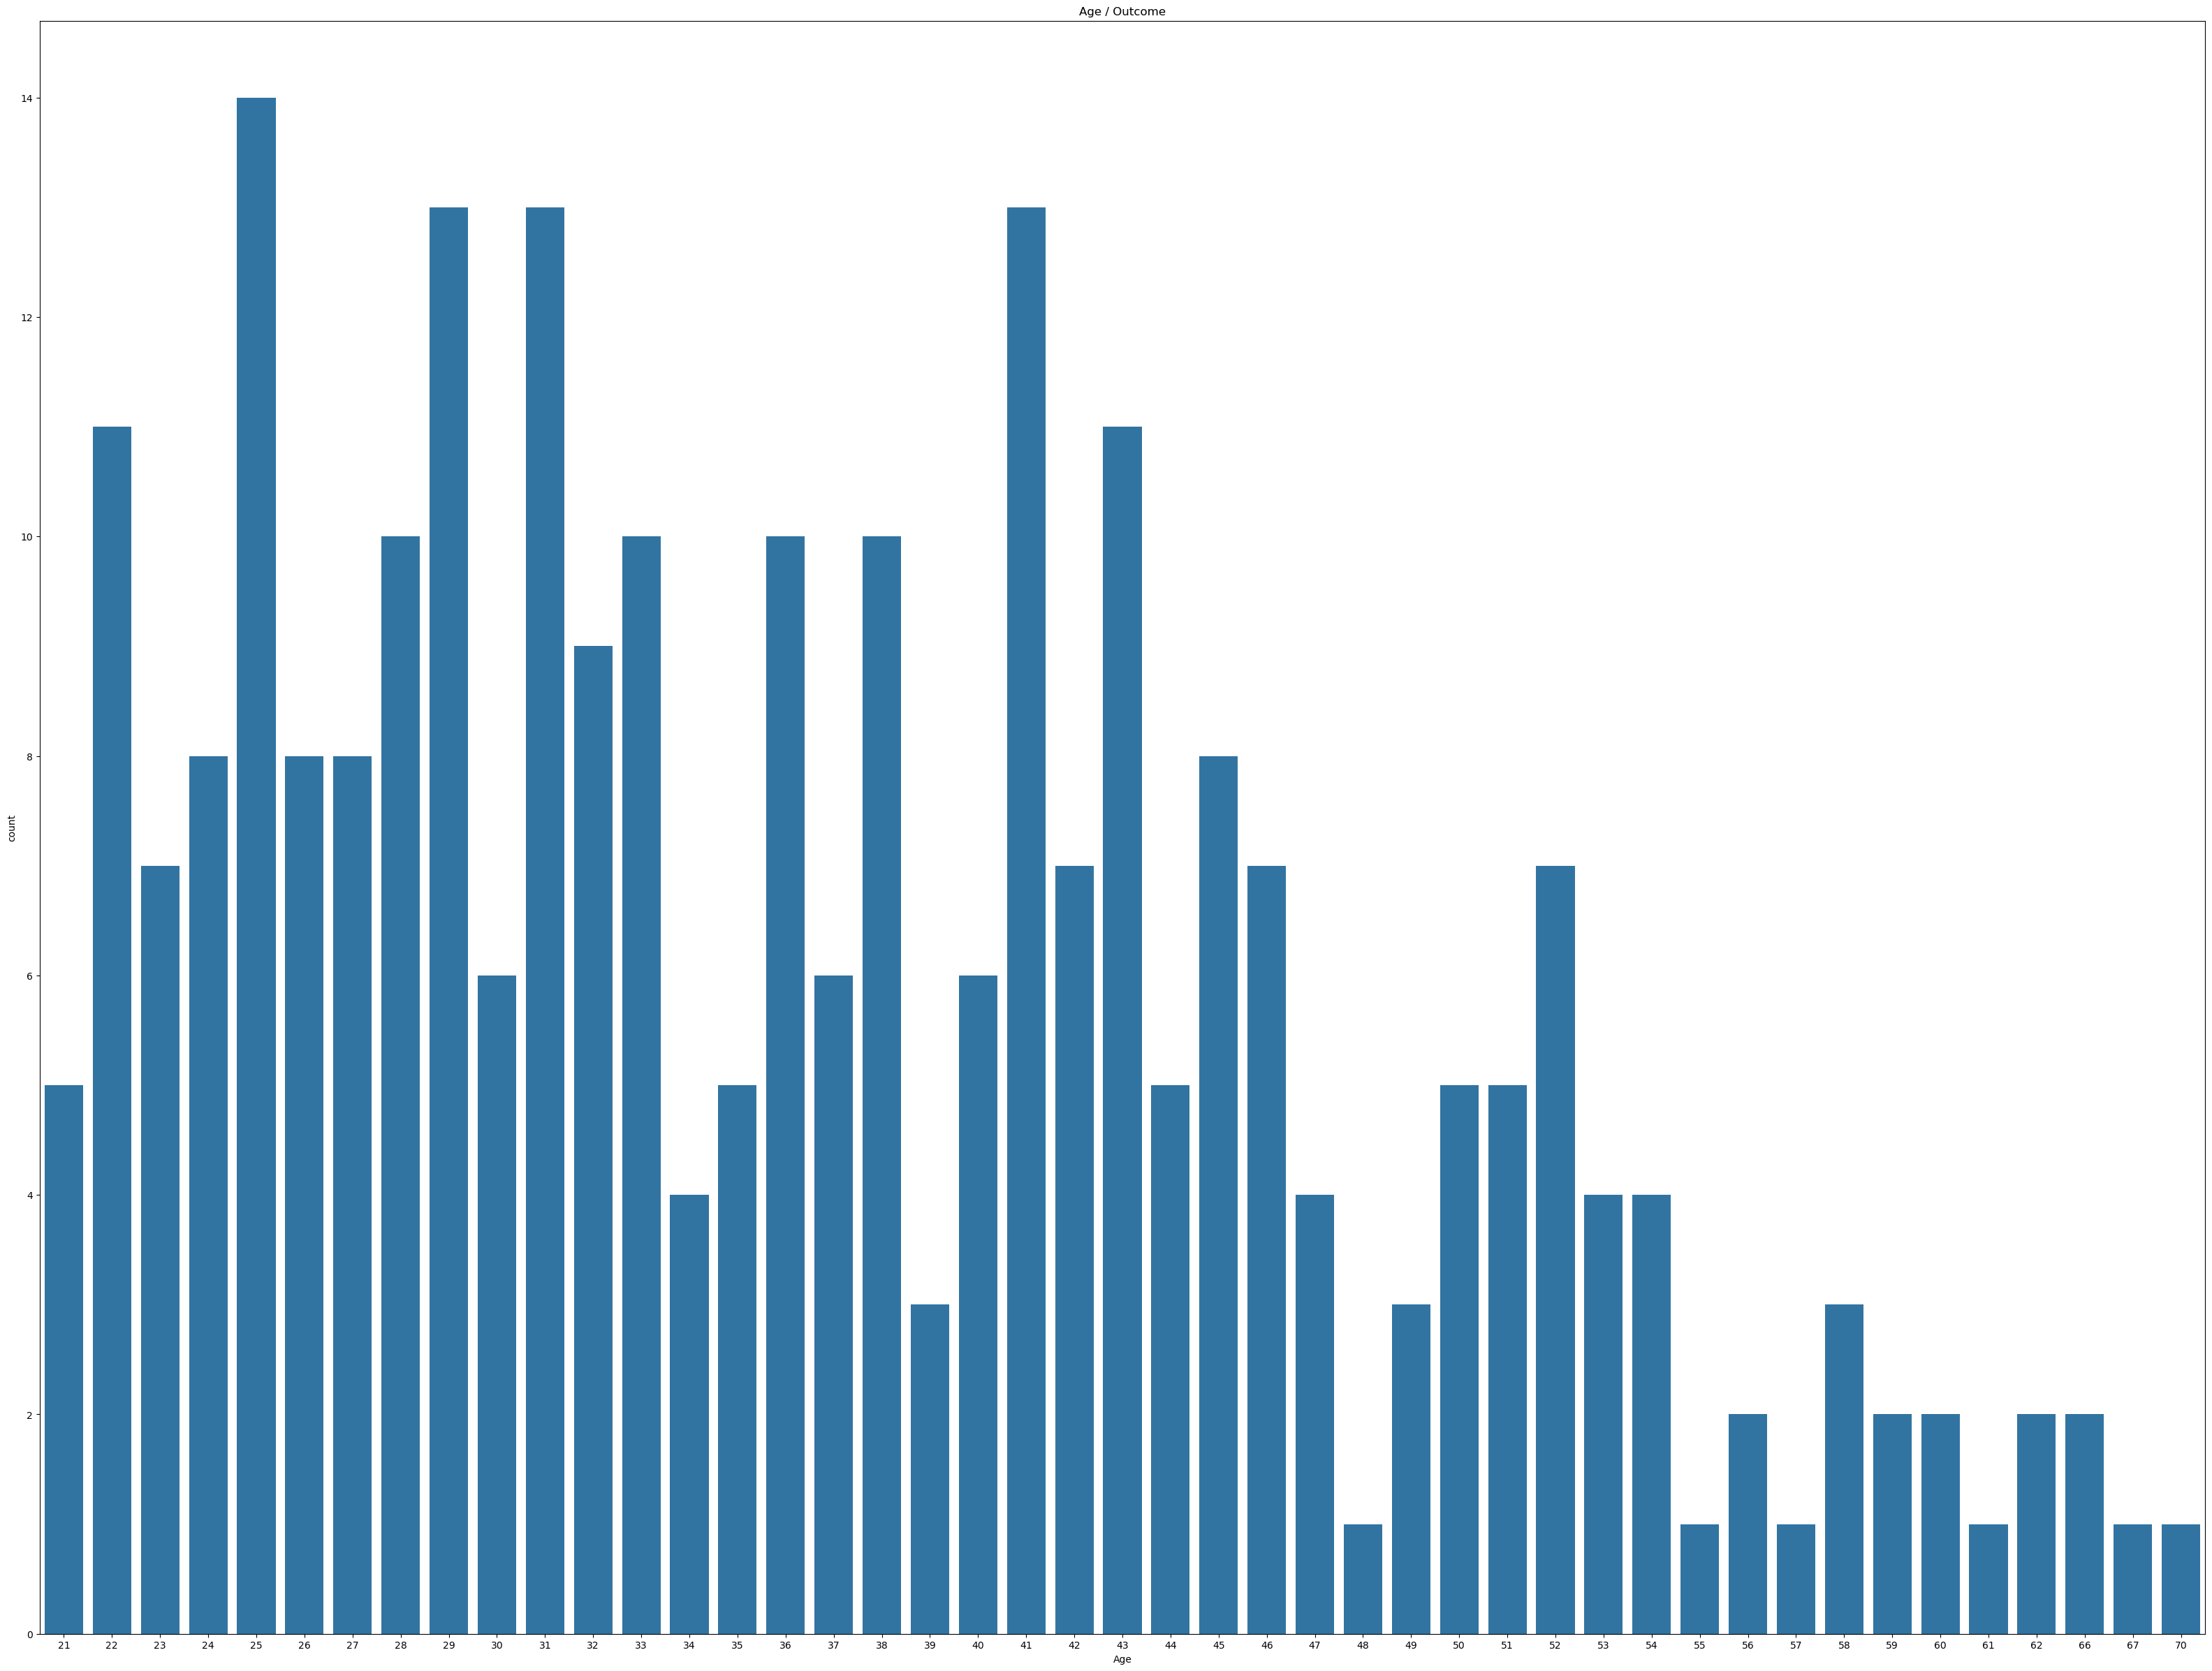

In [24]:
# 나이대별 당뇨병 분포 확인
plt.figure(figsize=(40,30))  
sns.countplot(x='Age',data=df[df['Outcome']==1])
plt.title("Age / Outcome")
plt.show

### RandomForestClassifier 적용하기

In [42]:
# 학습 데이터 생성

X=df_no_outliers[['Pregnancies', 'Glucose',	'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',	'DiabetesPedigreeFunction', 'Age']]
Y=df_no_outliers['Outcome']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# 데이터를 학습용과 테스트용으로 분리하기

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,random_state=42)

In [45]:
#RandomForestClassifier 불러오기

from sklearn.ensemble import RandomForestClassifier 

In [46]:
model=RandomForestClassifier()

In [47]:
#모델 학습

model.fit(X_train,Y_train)

RandomForestClassifier()

In [48]:
#머신러닝 모델의 테스트 데이터에 대한 예측값 구하기

y_predict= model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [49]:
#각 클래스의 확률을 예측하기

proba1 = model.predict_proba(X_test)
proba1

array([[0.98, 0.02],
       [0.74, 0.26],
       [0.74, 0.26],
       [0.93, 0.07],
       [0.6 , 0.4 ],
       [0.67, 0.33],
       [0.3 , 0.7 ],
       [0.63, 0.37],
       [0.81, 0.19],
       [0.94, 0.06],
       [0.15, 0.85],
       [0.85, 0.15],
       [0.91, 0.09],
       [0.87, 0.13],
       [0.59, 0.41],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.53, 0.47],
       [0.94, 0.06],
       [0.81, 0.19],
       [0.68, 0.32],
       [0.66, 0.34],
       [0.21, 0.79],
       [0.95, 0.05],
       [0.41, 0.59],
       [0.96, 0.04],
       [0.4 , 0.6 ],
       [0.2 , 0.8 ],
       [0.55, 0.45],
       [0.28, 0.72],
       [0.51, 0.49],
       [0.74, 0.26],
       [0.83, 0.17],
       [0.31, 0.69],
       [0.75, 0.25],
       [0.91, 0.09],
       [0.65, 0.35],
       [0.95, 0.05],
       [0.77, 0.23],
       [0.17, 0.83],
       [0.88, 0.12],
       [0.84, 0.16],
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.34, 0.66],
       [0.79, 0.21],
       [0.5 , 0.5 ],
       [0.19,

### 예측의 정확도 측정하기

In [50]:
y_predict
Y_test - y_predict


# 만든 모델이 얼마나 활용이 가능한지 확인하고 싶을 때
# 실제값 - 예측값을 빼주면 같은 값은 0으로 출력
# 여기에서 절댓값을 씌운 값이 1인 값이 다르게 예측한 값이 된다

585    0
35     0
289    0
205    0
199    1
      ..
334    0
681    0
114    0
85     0
53     0
Name: Outcome, Length: 184, dtype: int64

In [51]:
abs(Y_test - y_predict).sum() / len(Y_test)

0.2554347826086957

In [52]:
diff_count = abs(Y_test - y_predict).sum() 
diff_count

47

In [53]:
#예측의 정확도 구하기

(len(Y_test) - diff_count) / len(Y_test) * 100

74.45652173913044

In [54]:
model.feature_importances_

array([0.07737427, 0.26566129, 0.08800836, 0.06728362, 0.06577316,
       0.17292928, 0.12944376, 0.13352626])

<Axes: ylabel='None'>

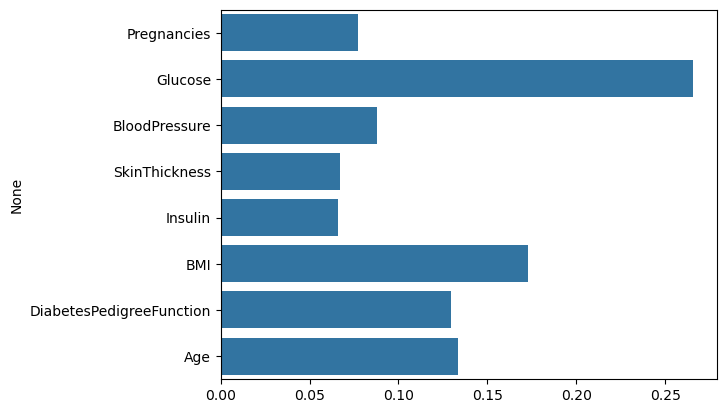

In [55]:
sns.barplot(x=model.feature_importances_, y=X.columns)